In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bike_sharing.csv to bike_sharing.csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Importing the data
df=pd.read_csv("bike_sharing.csv")

In [ ]:
#basic info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

All 4 types of season 4 is almost equally distributed.

In [ ]:
df.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

Here working day 0 means weekend(Saturday,Sunday)

In [ ]:
#checking how many types of value weather contains
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

Since Type 4 is containing only 1 observation,we can exclude it.

In [ ]:
#checking outliers in dataset
import seaborn as sns

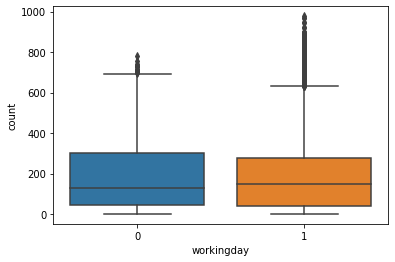

In [ ]:
#using boxplot to check outliers
sns.boxplot(x='workingday',y='count', data=df)

As its visible ,there are some outliers in data.

In [ ]:
#Now we are going to remove outliers using Inter Quartile Range(IQR)
# Data that greater than 1.5 times 3rd quartile & less than 1.5 times 1st quartile is considered to be outlier

q1=df['count'].quantile(0.25)
q3=df['count'].quantile(0.75)
iqr=q3-q1

In [ ]:
df=df[(df['count']>=q1-1.5*iqr) & (df['count']<=q3+1.5*iqr)]

In [ ]:
df.workingday.value_counts()

1    7161
0    3425
Name: workingday, dtype: int64

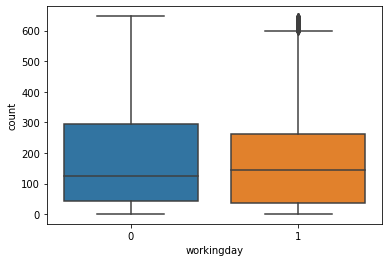

In [ ]:
#checking outliers are removed or not
sns.boxplot(x='workingday',y='count', data=df)


**Now we are goin to make Hypothesis**
Null Hypothesis = count on week days is equal to count on weekend

Alternative Hypothesis=count on week days is not equal to count on weekend

Alpha=0.05
As variance of population is not known we need to go with t test.

In [ ]:
# we will give equal no of data for weekday & for weekend to avoid the bias in data.
#as weekend data is having only 3425 record , we will give weekday data also 3425
weekday=df[df['workingday']==1]['count'].sample(3425)
weekend=df[df['workingday']==0]['count'].sample(3425)

In [ ]:
weekend.std()

164.29005403866455

In [ ]:
weekday

1983    174
2418    233
8442      9
4370      7
2219    216
       ... 
8545    159
3197      4
8425    214
7561     59
4453    166
Name: count, Length: 3425, dtype: int64

In [ ]:
weekday.std()

152.75719598834857

In [ ]:
#calculating p value for t test
from scipy.stats import ttest_ind
t_test, p_value= ttest_ind(weekday, weekend, equal_var=False)

In [ ]:
p_value

0.027036596138418474

Since p value is <0.05 , Null hypothesis is rejected & Alternate is accepted

In [ ]:
#IS the demand for cycle is same in diffrent weathers

In [ ]:
df['weather'].value_counts()

1    6965
2    2770
3     850
4       1
Name: weather, dtype: int64

In [ ]:
df=df[~(df['weather']==4)]

In [ ]:
w1=df[df['weather']==1]['count'].sample(850)
w2=df[df['weather']==2]['count'].sample(850)
w2=df[df['weather']==3]['count'].sample(850)


In [ ]:
df.groupby(['weather'])['count'].describe()


,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,6965.0,187.329218,161.581066,1.0,45.0,153.0,287.0,647.0
2,2770.0,166.117690,146.992422,1.0,39.0,130.0,254.0,646.0
3,850.0,111.862353,121.233389,1.0,23.0,70.5,157.0,646.0


Null = Count is same for different weather
Alternative = Count is different for different weather


Assumptions checking
1. Count is following a normal distribution
2. equal variances

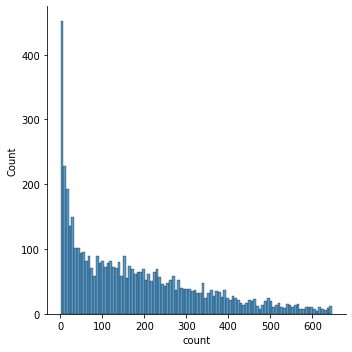

In [ ]:
sns.displot(df['count'].sample(4999), bins=100)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


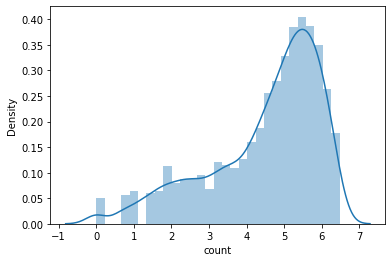

In [ ]:
sns.distplot(np.log(df['count'].sample(4999)))
